## Comparing different configurations of $\gamma_1$ and $\gamma_2$

In [18]:
from mlswarm.mlswarm import function
import numpy as np

N_dim=10
f = lambda x: np.mean([100*(x[i+1]-x[i]**2)**2 + (1-x[i])**2 for i in range(N_dim-1)],axis=0)
name = "Function4"
gammas = [[0,0,0], [5,0,0], [0,5,0], [5,5,0], [10,10,0], [10,0,1]]
func_list = []

for i in range(len(gammas)):
    func6 = function(f, name)
    np.random.seed(42)
    func6.init_cloud(np.array(np.random.normal(2,1,(N_dim,50))))
    func6.minimize(max_iterations = 10000, var_epsilon = 0, 
              learning_rate = 0.001,
              method = "swarm_derivfree",
              kernel_a = 0.01, alpha_init = 0, alpha_rate = 1, beta=0, gamma=1,
              verbose = False)
    func_list.append(func)

Maximum amount of iterations reached

Function value at cloud mean: 1.068094856068344
Function value evaluated 500000 times

The clock time (CPU time) for train_fmin was 5.51718 (5.54688) seconds
Maximum amount of iterations reached

Function value at cloud mean: 0.6102328387838786
Function value evaluated 500000 times

The clock time (CPU time) for train_fmin was 5.61431 (5.62500) seconds
Maximum amount of iterations reached

Function value at cloud mean: 0.554963371915044
Function value evaluated 500000 times

The clock time (CPU time) for train_fmin was 5.71740 (5.71875) seconds
Maximum amount of iterations reached

Function value at cloud mean: 1.0714691949213382
Function value evaluated 500000 times

The clock time (CPU time) for train_fmin was 5.53106 (5.53125) seconds
Maximum amount of iterations reached

Function value at cloud mean: 0.6133691636293664
Function value evaluated 500000 times

The clock time (CPU time) for train_fmin was 5.56688 (5.56250) seconds
Maximum amount of

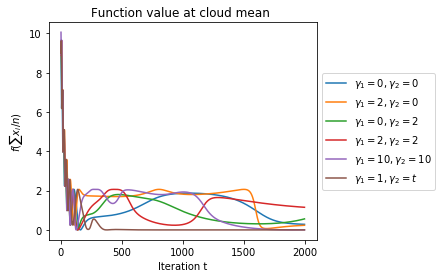

C:\Users\Rafael Cabral\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


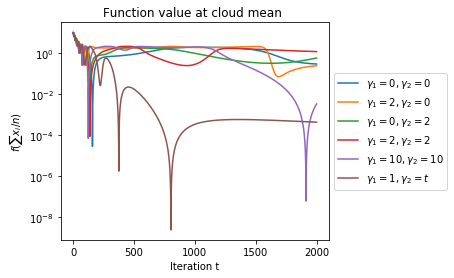

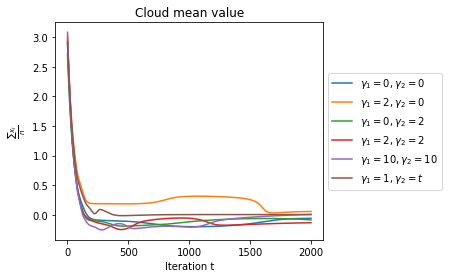

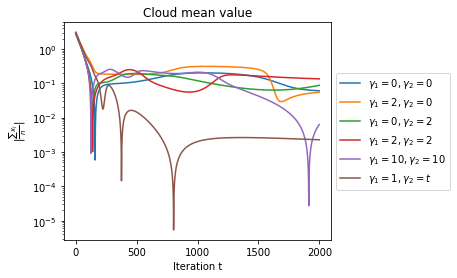

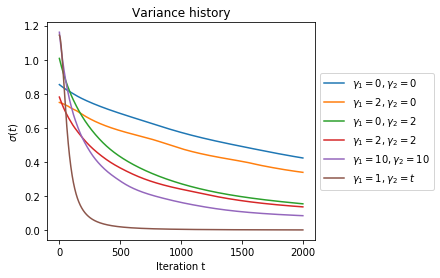

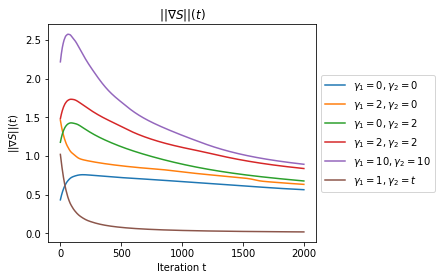

In [3]:
from mlswarm.mlswarm import plot_data
history_cost_mean = np.array([func.cost_history_mean for func in func_list]) #cloud mean value for each configuration
history_cloud_mean = np.array([func.cloud_history_mean for func in func_list])
cloud_var_history = np.array([func.cloud_var_history for func in func_list])
gradS_history = np.array([func.gradS_history for func in func_list])
max_iterations = func_list[0].train_parameters[0]
x = np.arange(max_iterations)

legend = [r'$\gamma_1 = 0, \gamma_2 = 0$',r'$\gamma_1 = 2, \gamma_2 = 0$',r'$\gamma_1 = 0, \gamma_2 = 2$',r'$\gamma_1 = 2, \gamma_2 = 2$',r'$\gamma_1 = 10, \gamma_2 = 10$', r'$\gamma_1 = 1, \gamma_2 = t$']
plot_data(x, history_cost_mean, 'Function value at cloud mean ', 'Iteration t', r'$f(\sum x_i/n )$', legend, False)
plot_data(x, np.absolute(history_cost_mean), 'Function value at cloud mean ', 'Iteration t', r'$f(\sum x_i/n )$', legend, True)
plot_data(x, history_cloud_mean, 'Cloud mean value', 'Iteration t', r'$\frac{\sum x_i}{n}$', legend)
plot_data(x, np.absolute(history_cloud_mean), 'Cloud mean value', 'Iteration t', r'$|\frac{\sum x_i}{n}|$', legend,True)
plot_data(x, cloud_var_history, 'Variance history', 'Iteration t', r'$\sigma (t)$', legend)
plot_data(x, gradS_history, r'$||\nabla S|| (t)$', 'Iteration t', r'$||\nabla S|| (t)$', legend)


## Studying $\gamma_1 = 1$ and $\gamma_2 = t$ more in depth

Maximum amount of iterations reached

Function value at cloud mean: 0.0021240102503514817
Function value evaluated 100000 times

The clock time (CPU time) for train_fmin was 0.49803 (0.48438) seconds


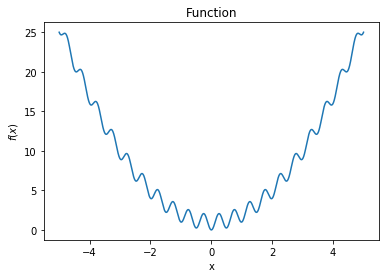

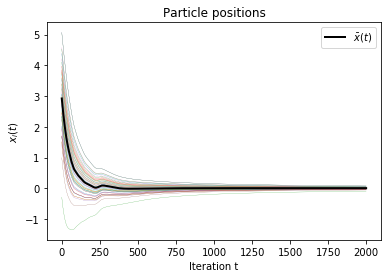

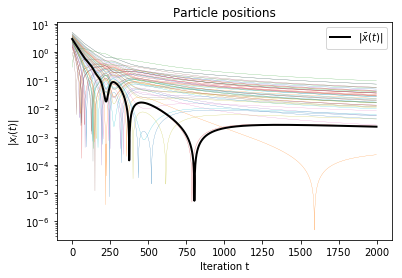

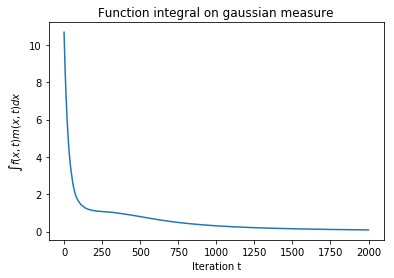

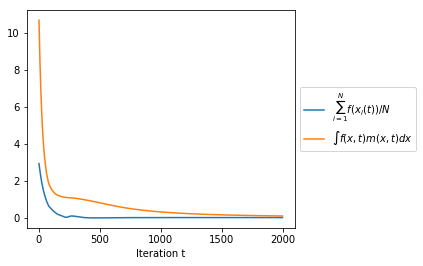

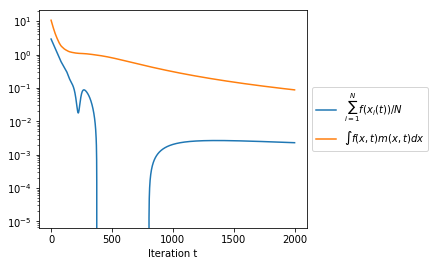

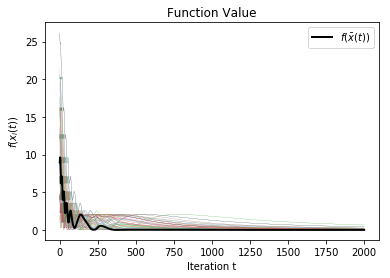

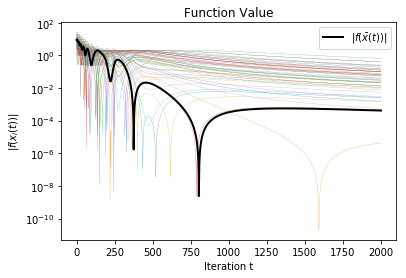

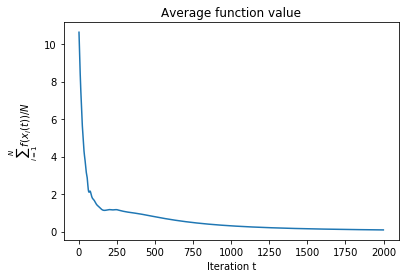

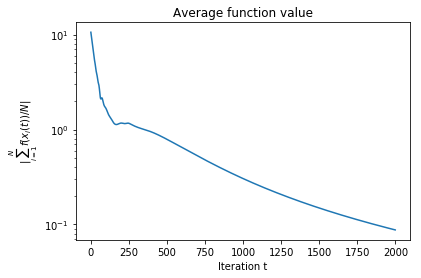

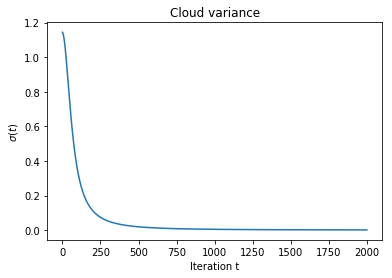

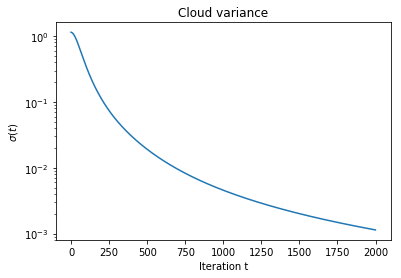

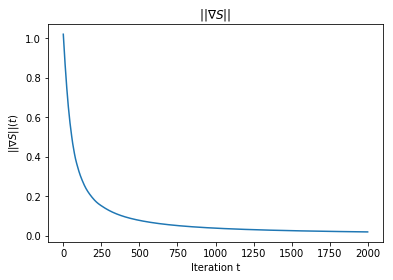

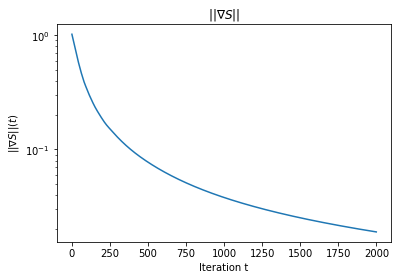

In [4]:
func_derivfree = function(f, name)
np.random.seed(42)
func_derivfree.init_cloud(np.array(np.random.normal(3,1,(1,50))))
func_derivfree.minimize(max_iterations = 2000, var_epsilon = 0, 
                  learning_rate = 0.01,
                  method = "swarm_derivfree",
                  kernel_a = 0.01, alpha_init = 0, alpha_rate = 1, beta=0, gamma=1,
                  verbose = False, track_history = True)
func.plot_everything(folder_name = func.name + "_derivfree", f_dim = 1, log = True)

## Derivative version with $\alpha = t$

Maximum amount of iterations reached

Function value at cloud mean: 3.6295824534246876e-06
Function value evaluated 300000 times

The clock time (CPU time) for train_fmin was 0.65897 (0.65625) seconds


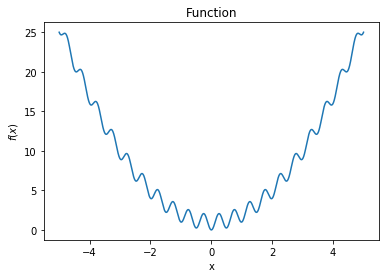

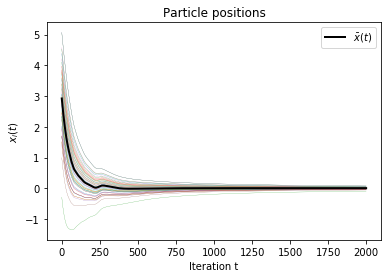

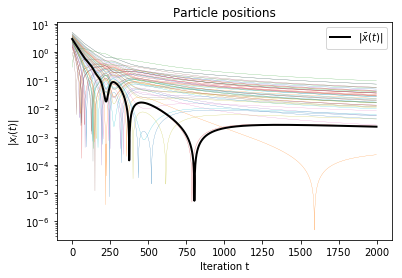

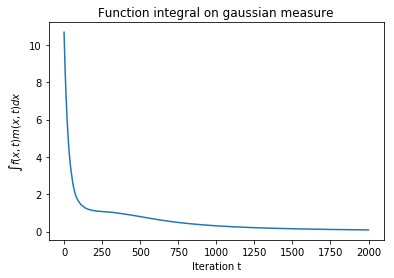

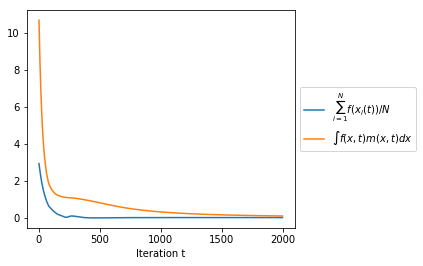

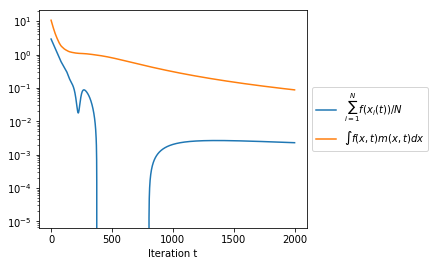

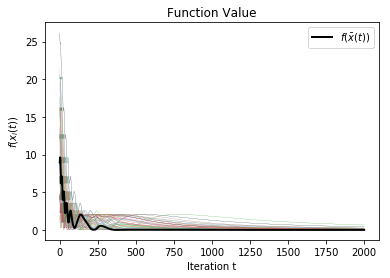

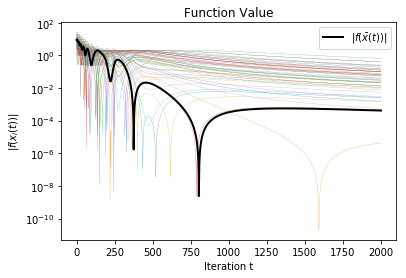

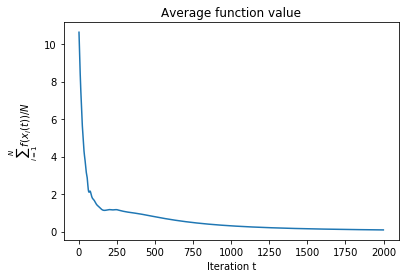

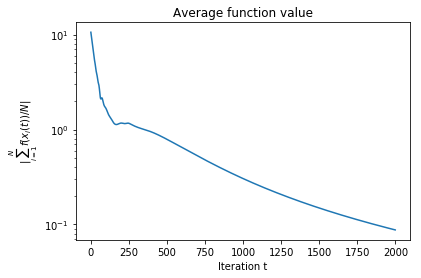

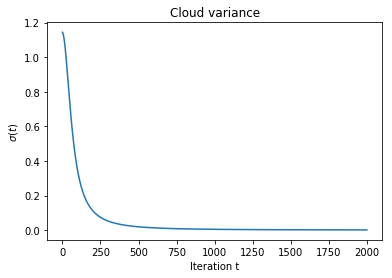

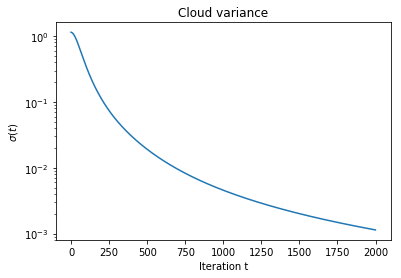

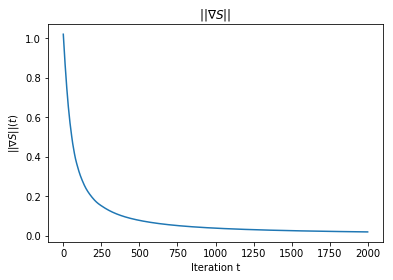

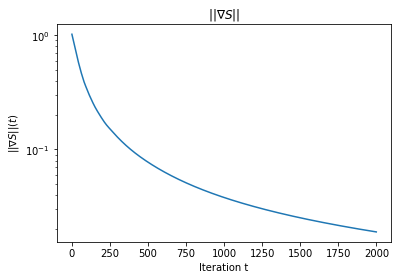

In [5]:
func_deriv = function(lambda x: x[0]**2 - (np.cos(4 * np.pi *x[0]) - 1), "f(x) = x^2 - (cos(4 Pi x) -1)")
np.random.seed(42)
func_deriv.init_cloud(np.array(np.random.normal(3,1,(1,50))))
func_deriv.minimize(max_iterations = 2000, var_epsilon = 0, 
                  learning_rate = 0.01,
                  method = "swarm",
                  kernel_a = 0.01, alpha_init = 0, alpha_rate = 1, beta=0, gamma=0,
                  verbose = False, track_history = True)
func.plot_everything(folder_name = func.name + "_deriv", f_dim = 1, log = True)

## Difference between derivative and non-derivative version

In [6]:
diff = np.absolute((np.array(func_derivfree.cloud_history_mean) - np.array(func_deriv.cloud_history_mean))).flatten() 

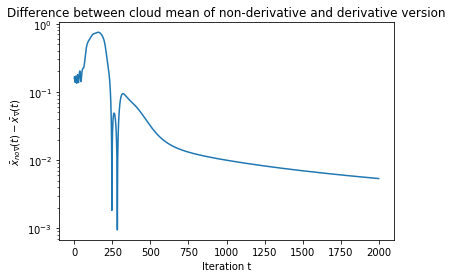

In [7]:
x = np.arange(max_iterations)
plot_data(x, [diff], 'Difference between cloud mean of non-derivative and derivative version', 'Iteration t', r'$\bar{x}_{no \nabla} (t) - \bar{x}_{\nabla} (t) $', legend = None, log = True)